# Muhammad Abdullah 
# 22P-9371
# Data Science Assignment # 2
# BCS-6B

# Task A: Data Cleaning and Analysis

1. Handling Missing Values

In [2]:
import pandas as pd
import numpy as np

# Load the dataset (assuming it’s in CSV format)
file_path = "weather_records.csv"  
data = pd.read_csv(file_path)

# Convert StartTime(UTC) to datetime with slash-based format (MM/DD/YY HH:MM)
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'], format='%m/%d/%y %H:%M', utc=True)

# Initial missing value check
print("Missing values per column:\n", data.isnull().sum())

# Step 1: Fill time-related columns with forward fill
data['StartTime(UTC)'] = data['StartTime(UTC)'].ffill()
data['EndTime(UTC)'] = data['EndTime(UTC)'].ffill()

# Step 2: Fill Precipitation(in) with forward fill (assuming sequential weather events)
data['Precipitation(in)'] = data['Precipitation(in)'].ffill()

# Step 3: Fill location-related columns using neighboring rows
data['TimeZone'] = data['TimeZone'].ffill()
data['AirportCode'] = data['AirportCode'].ffill()

# LocationLat and LocationLng should match AirportCode, so fill based on AirportCode
for code in data['AirportCode'].unique():
    if pd.notna(code):
        lat = data[data['AirportCode'] == code]['LocationLat'].mode()[0]
        lng = data[data['AirportCode'] == code]['LocationLng'].mode()[0]
        data.loc[data['AirportCode'] == code, 'LocationLat'] = data.loc[data['AirportCode'] == code, 'LocationLat'].fillna(lat)
        data.loc[data['AirportCode'] == code, 'LocationLng'] = data.loc[data['AirportCode'] == code, 'LocationLng'].fillna(lng)

# Step 4: Fill City, County, State, and ZipCode using AirportCode
for code in data['AirportCode'].unique():
    if pd.notna(code):
        city = data[data['AirportCode'] == code]['City'].mode()
        county = data[data['AirportCode'] == code]['County'].mode()
        state = data[data['AirportCode'] == code]['State'].mode()
        zipcode = data[data['AirportCode'] == code]['ZipCode'].mode()
        if not city.empty:
            data.loc[data['AirportCode'] == code, 'City'] = data.loc[data['AirportCode'] == code, 'City'].fillna(city[0])
        if not county.empty:
            data.loc[data['AirportCode'] == code, 'County'] = data.loc[data['AirportCode'] == code, 'County'].fillna(county[0])
        if not state.empty:
            data.loc[data['AirportCode'] == code, 'State'] = data.loc[data['AirportCode'] == code, 'State'].fillna(state[0])
        if not zipcode.empty:
            data.loc[data['AirportCode'] == code, 'ZipCode'] = data.loc[data['AirportCode'] == code, 'ZipCode'].fillna(zipcode[0])

# Step 5: Drop rows where Type or Severity is NaN (no way to infer)
data.dropna(subset=['Type', 'Severity'], inplace=True)

# Convert StartTime(UTC) back to MM/DD/YY HH:MM format for saving
data['StartTime(UTC)'] = data['StartTime(UTC)'].dt.strftime('%m/%d/%y %H:%M')

# Final missing value check
print("Missing values after cleaning:\n", data.isnull().sum())

# Simplified explanation for dropped columns
print("Dropped 'Type' and 'Severity' rows because they’re key fields with no way to guess missing values.")

# Save the modified DataFrame back to the original CSV file
data.to_csv(file_path, index=False)
print(f"Original file {file_path} updated with cleaned data")

Missing values per column:
 Type                 0
Severity             0
StartTime(UTC)       0
EndTime(UTC)         0
Precipitation(in)    0
TimeZone             0
AirportCode          0
LocationLat          0
LocationLng          0
City                 0
County               0
State                0
ZipCode              0
Hour                 0
DayOfWeek            0
Month                0
Duration             0
Season               0
Severity_Encoded     0
dtype: int64
Missing values after cleaning:
 Type                 0
Severity             0
StartTime(UTC)       0
EndTime(UTC)         0
Precipitation(in)    0
TimeZone             0
AirportCode          0
LocationLat          0
LocationLng          0
City                 0
County               0
State                0
ZipCode              0
Hour                 0
DayOfWeek            0
Month                0
Duration             0
Season               0
Severity_Encoded     0
dtype: int64
Dropped 'Type' and 'Severity' rows becau

2. Feature Engineering for Date Column:

In [30]:
import pandas as pd

# Load the dataset
file_path = "weather_records.csv"
data = pd.read_csv(file_path)

# Convert StartTime(UTC) to datetime with explicit slash-based format
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'], format='%m/%d/%y %H:%M', utc=True)

# Extract features
data['Hour'] = data['StartTime(UTC)'].dt.hour
data['DayOfWeek'] = data['StartTime(UTC)'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['Month'] = data['StartTime(UTC)'].dt.month

# Convert StartTime(UTC) back to MM/DD/YY HH:MM format for saving
data['StartTime(UTC)'] = data['StartTime(UTC)'].dt.strftime('%m/%d/%y %H:%M')

# Display sample of extracted features for verification
print("Sample of extracted features:")
print(data[['StartTime(UTC)', 'Hour', 'DayOfWeek', 'Month']].head())

# Explanation of usefulness
print("""
Why these features are useful:
- Hour: Weather patterns, such as precipitation or fog, often follow daily cycles (e.g., afternoon thunderstorms due to solar heating or early morning fog).
- DayOfWeek: Identifies potential weekly patterns, which might reflect data collection biases or rare cyclical weather phenomena (e.g., weekend vs. weekday differences).
- Month: Captures seasonal trends, essential for understanding variations in precipitation, temperature, and weather types (e.g., snowy winters vs. rainy springs).
""")

# Save the updated DataFrame back to the original CSV file
data.to_csv(file_path, index=False)
print(f"Original file {file_path} updated with new features: 'Hour', 'DayOfWeek', and 'Month'.")

Sample of extracted features:
   StartTime(UTC)  Hour  DayOfWeek  Month
0  01/06/16 23:14    23          2      1
1  01/07/16 04:14     4          3      1
2  01/07/16 05:54     5          3      1
3  01/08/16 05:34     5          4      1
4  01/08/16 13:54    13          4      1

Why these features are useful:
- Hour: Weather patterns, such as precipitation or fog, often follow daily cycles (e.g., afternoon thunderstorms due to solar heating or early morning fog).
- DayOfWeek: Identifies potential weekly patterns, which might reflect data collection biases or rare cyclical weather phenomena (e.g., weekend vs. weekday differences).
- Month: Captures seasonal trends, essential for understanding variations in precipitation, temperature, and weather types (e.g., snowy winters vs. rainy springs).

Original file weather_records.csv updated with new features: 'Hour', 'DayOfWeek', and 'Month'.


# Task B: Visualization (10 Marks)

Original file weather_records.csv updated with new features: 'Hour', 'DayOfWeek', and 'Month'.


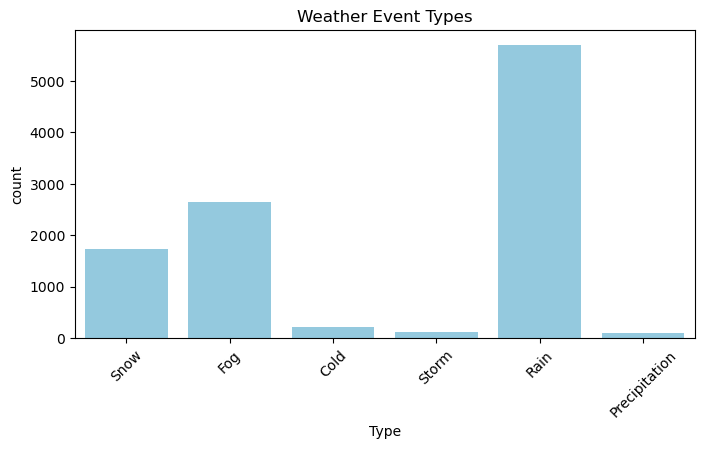

Insight: Shows the frequency of each weather type (e.g., Snow, Rain), highlighting dominant conditions.


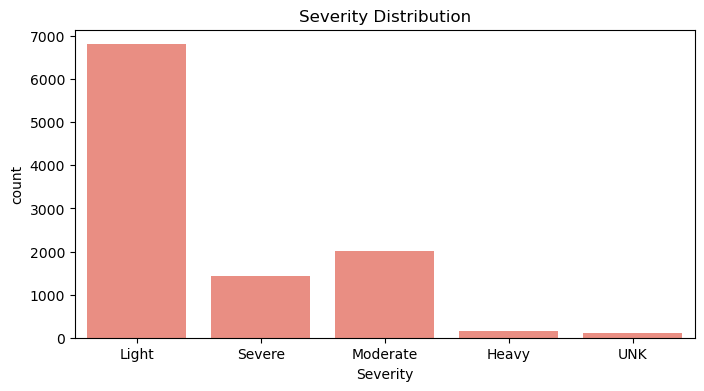

Insight: Reveals the prevalence of severity levels (e.g., Light vs. Severe).


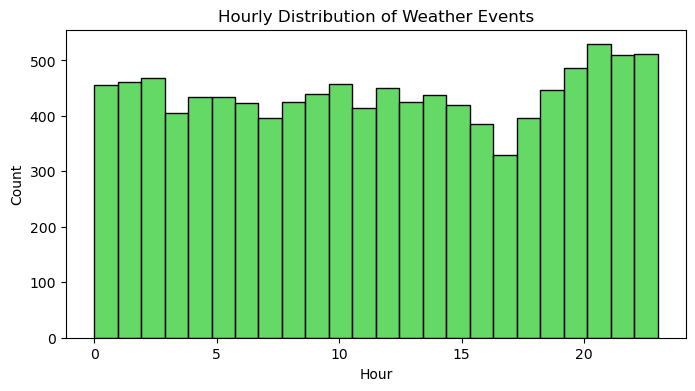

Insight: Indicates peak times for weather events (e.g., afternoon spikes).


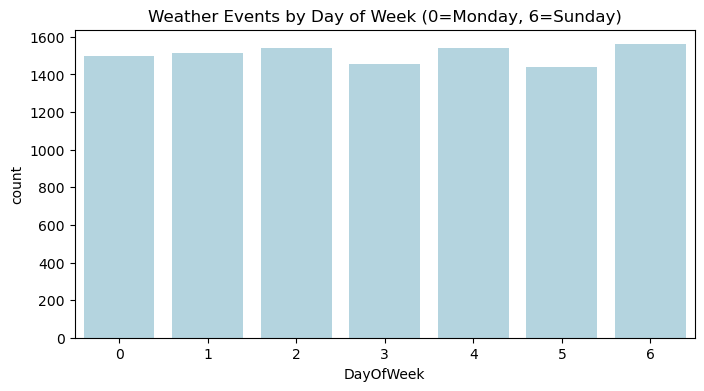

Insight: Shows if weather events vary by day of the week.


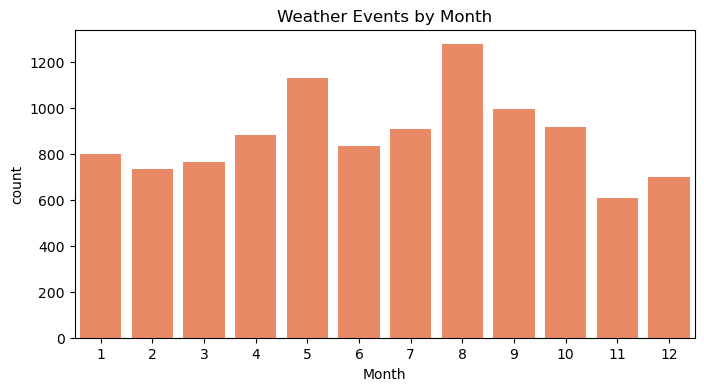

Insight: Highlights seasonal patterns in weather events.


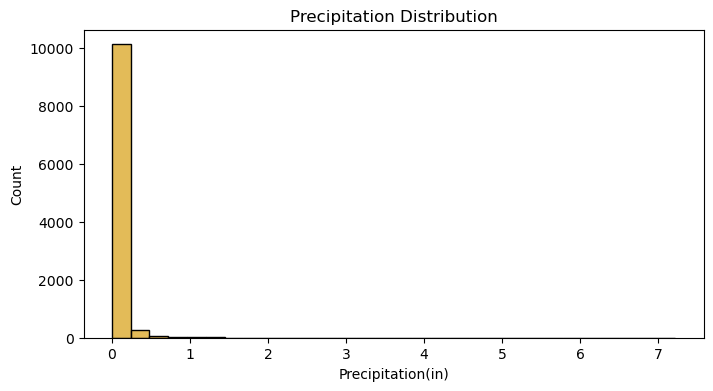

Insight: Shows the range and frequency of precipitation amounts.


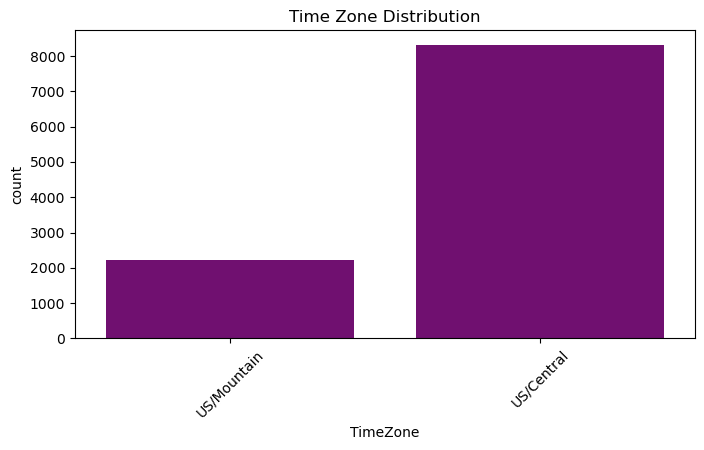

Insight: Highlights the geographical spread of data by time zones.


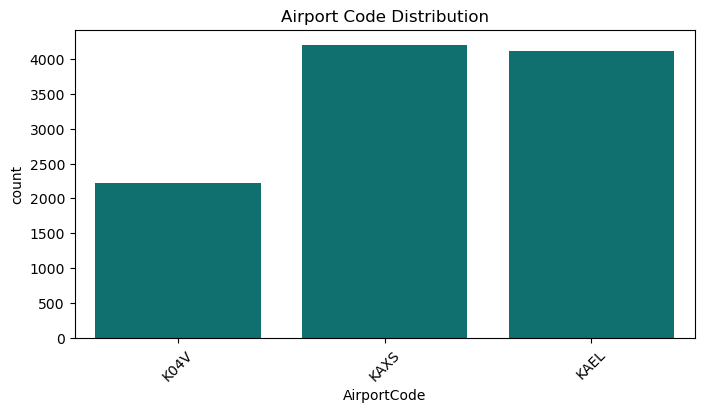

Insight: Identifies which airports report the most weather events.


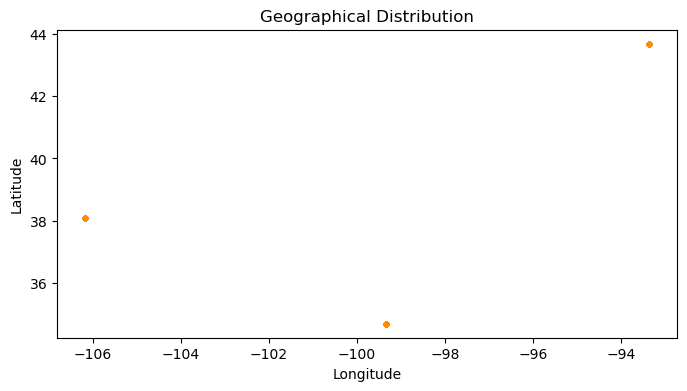

Insight: Visualizes the spatial spread of weather events.


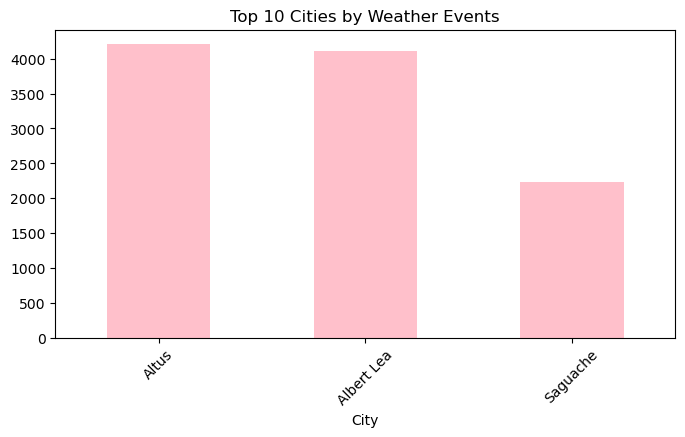

Insight: Identifies cities with the most frequent weather events.


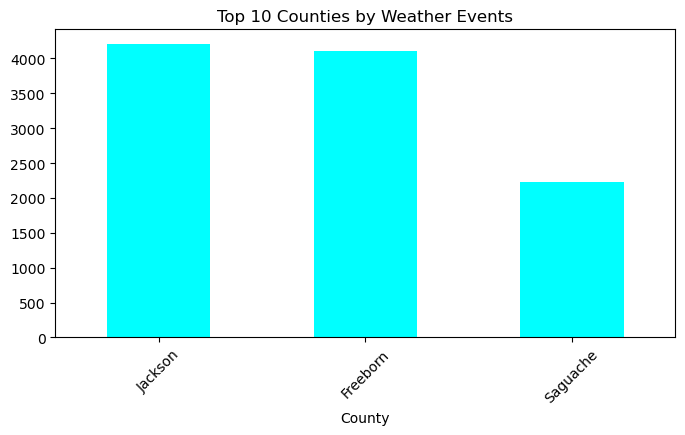

Insight: Highlights counties most affected by weather.


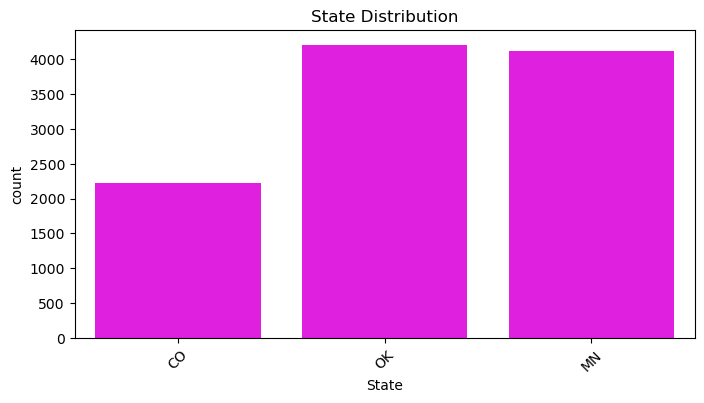

Insight: Shows which states have the most weather events.


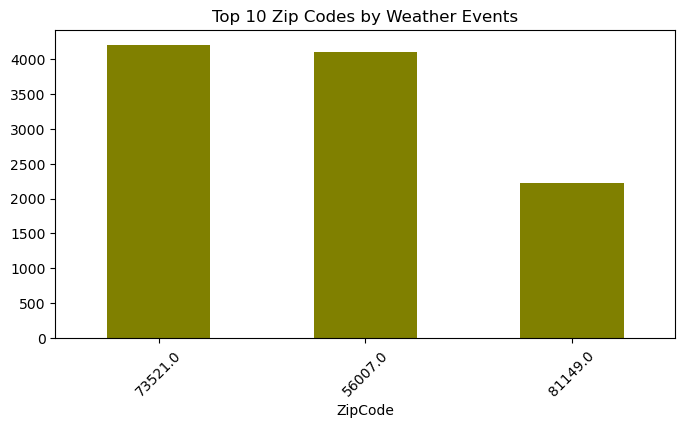

Insight: Pinpoints specific areas with frequent weather activity.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "weather_records.csv"
data = pd.read_csv(file_path)

# Convert StartTime(UTC) to datetime with slash-based format (MM/DD/YY HH:MM)
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'], format='%m/%d/%y %H:%M', utc=True)

# Extract features
data['Hour'] = data['StartTime(UTC)'].dt.hour
data['DayOfWeek'] = data['StartTime(UTC)'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['Month'] = data['StartTime(UTC)'].dt.month

# Convert ZipCode to string to avoid float-dtype issues
data['ZipCode'] = data['ZipCode'].astype(str)

# Keep StartTime(UTC) in MM/DD/YY HH:MM format for saving
data['StartTime(UTC)'] = data['StartTime(UTC)'].dt.strftime('%m/%d/%y %H:%M')

# Save the updated DataFrame with new features back to the CSV
data.to_csv(file_path, index=False)
print(f"Original file {file_path} updated with new features: 'Hour', 'DayOfWeek', and 'Month'.")

# 1. Type (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Type', color='skyblue')
plt.title('Weather Event Types')
plt.xticks(rotation=45)
plt.show()
print("Insight: Shows the frequency of each weather type (e.g., Snow, Rain), highlighting dominant conditions.")

# 2. Severity (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Severity', color='salmon')
plt.title('Severity Distribution')
plt.show()
print("Insight: Reveals the prevalence of severity levels (e.g., Light vs. Severe).")

# 3. StartTime(UTC) - Hour (Histogram)
plt.figure(figsize=(8, 4))
sns.histplot(data['Hour'], bins=24, color='limegreen')
plt.title('Hourly Distribution of Weather Events')
plt.show()
print("Insight: Indicates peak times for weather events (e.g., afternoon spikes).")

# 4. DayOfWeek (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='DayOfWeek', color='lightblue')
plt.title('Weather Events by Day of Week (0=Monday, 6=Sunday)')
plt.show()
print("Insight: Shows if weather events vary by day of the week.")

# 5. Month (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Month', color='coral')
plt.title('Weather Events by Month')
plt.show()
print("Insight: Highlights seasonal patterns in weather events.")

# 6. Precipitation(in) (Histogram)
plt.figure(figsize=(8, 4))
sns.histplot(data['Precipitation(in)'], bins=30, color='goldenrod')
plt.title('Precipitation Distribution')
plt.show()
print("Insight: Shows the range and frequency of precipitation amounts.")

# 7. TimeZone (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='TimeZone', color='purple')
plt.title('Time Zone Distribution')
plt.xticks(rotation=45)
plt.show()
print("Insight: Highlights the geographical spread of data by time zones.")

# 8. AirportCode (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='AirportCode', color='teal')
plt.title('Airport Code Distribution')
plt.xticks(rotation=45)
plt.show()
print("Insight: Identifies which airports report the most weather events.")

# 9. LocationLat (Scatter with LocationLng)
plt.figure(figsize=(8, 4))
plt.scatter(data['LocationLng'], data['LocationLat'], alpha=0.5, color='darkorange', s=10)
plt.title('Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print("Insight: Visualizes the spatial spread of weather events.")

# 10. City (Bar Chart - Top 10)
plt.figure(figsize=(8, 4))
data['City'].value_counts()[:10].plot(kind='bar', color='pink')
plt.title('Top 10 Cities by Weather Events')
plt.xticks(rotation=45)
plt.show()
print("Insight: Identifies cities with the most frequent weather events.")

# 11. County (Bar Chart - Top 10)
plt.figure(figsize=(8, 4))
data['County'].value_counts()[:10].plot(kind='bar', color='cyan')
plt.title('Top 10 Counties by Weather Events')
plt.xticks(rotation=45)
plt.show()
print("Insight: Highlights counties most affected by weather.")

# 12. State (Bar Chart)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='State', color='magenta')
plt.title('State Distribution')
plt.xticks(rotation=45)
plt.show()
print("Insight: Shows which states have the most weather events.")

# 13. ZipCode (Bar Chart - Top 10)
plt.figure(figsize=(8, 4))
data['ZipCode'].value_counts()[:10].plot(kind='bar', color='olive')
plt.title('Top 10 Zip Codes by Weather Events')
plt.xticks(rotation=45)
plt.show()
print("Insight: Pinpoints specific areas with frequent weather activity.")

# Task C: Advanced Feature Engineering (20 Marks)

1. Create New Features:

In [33]:
import pandas as pd

# Load the dataset
file_path = "weather_records.csv"
data = pd.read_csv(file_path)

# Convert StartTime(UTC) to datetime with explicit slash-based format
data['StartTime(UTC)'] = pd.to_datetime(data['StartTime(UTC)'], format='%m/%d/%y %H:%M', utc=True)

# Convert EndTime(UTC) to datetime with explicit slash-based format
data['EndTime(UTC)'] = pd.to_datetime(data['EndTime(UTC)'], format='%m/%d/%y %H:%M', utc=True)

# Calculate Duration in hours
data['Duration'] = (data['EndTime(UTC)'] - data['StartTime(UTC)']).dt.total_seconds() / 3600

# Define Season based on Month (assuming Month is from Task A.2)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# If Month isn’t already in the DataFrame, extract it from StartTime(UTC)
if 'Month' not in data.columns:
    data['Month'] = data['StartTime(UTC)'].dt.month

data['Season'] = data['Month'].apply(get_season)

# Convert StartTime(UTC) and EndTime(UTC) back to MM/DD/YY HH:MM format for saving
data['StartTime(UTC)'] = data['StartTime(UTC)'].dt.strftime('%m/%d/%y %H:%M')
data['EndTime(UTC)'] = data['EndTime(UTC)'].dt.strftime('%m/%d/%y %H:%M')

# Verify new features with a sample
print("Sample of new features:")
print(data[['StartTime(UTC)', 'EndTime(UTC)', 'Duration', 'Month', 'Season']].head())

# Save the updated DataFrame back to the original CSV file
data.to_csv(file_path, index=False)
print(f"Original file {file_path} updated with new features: 'Duration' and 'Season'.")

Sample of new features:
   StartTime(UTC)    EndTime(UTC)  Duration  Month  Season
0  01/06/16 23:14  01/07/16 00:34  1.333333      1  Winter
1  01/07/16 04:14  01/07/16 04:54  0.666667      1  Winter
2  01/07/16 05:54  01/07/16 15:34  9.666667      1  Winter
3  01/08/16 05:34  01/08/16 05:54  0.333333      1  Winter
4  01/08/16 13:54  01/08/16 15:54  2.000000      1  Winter
Original file weather_records.csv updated with new features: 'Duration' and 'Season'.


2. Encoding Categorical Variables:

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to Severity column
data['Severity_Encoded'] = le.fit_transform(data['Severity'])

# Display the encoding mapping
severity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Severity Encoding:", severity_mapping)

# Explanation of choice
print("""
Choice: Label encoding is used because Severity has an ordinal relationship 
(e.g., Light = 0, Moderate = 1, Severe = 2), where the numerical order reflects 
increasing intensity or impact. One-hot encoding would be less appropriate here 
as it treats categories as independent, ignoring the inherent order in Severity levels.
""")

# Optional: Verify a sample of the encoded data
print("Sample of Severity and Severity_Encoded:")
print(data[['Severity', 'Severity_Encoded']].head()) 
data.to_csv(file_path, index=False)
print(f"Updated file {file_path} with 'Severity_Encoded'.")

Severity Encoding: {'Heavy': 0, 'Light': 1, 'Moderate': 2, 'Severe': 3, 'UNK': 4}

Choice: Label encoding is used because Severity has an ordinal relationship 
(e.g., Light = 0, Moderate = 1, Severe = 2), where the numerical order reflects 
increasing intensity or impact. One-hot encoding would be less appropriate here 
as it treats categories as independent, ignoring the inherent order in Severity levels.

Sample of Severity and Severity_Encoded:
  Severity  Severity_Encoded
0    Light                 1
1    Light                 1
2    Light                 1
3    Light                 1
4    Light                 1
Updated file weather_records.csv with 'Severity_Encoded'.


# Task D: Advanced Analysis (20 Marks)

1. Correlation Analysis:

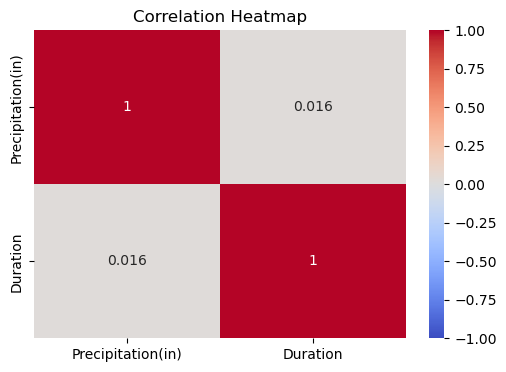

Insight: A positive correlation suggests longer weather events may lead to higher precipitation, though the strength depends on the value (e.g., weak if < 0.3).


In [36]:
# Calculate correlation
corr = data[['Precipitation(in)', 'Duration']].corr()

# Visualize with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

print("Insight: A positive correlation suggests longer weather events may lead to higher precipitation, though the strength depends on the value (e.g., weak if < 0.3).")

2. Outlier Detection:

Number of outliers: 2497
Lower bound: 0.00, Upper bound: 0.00


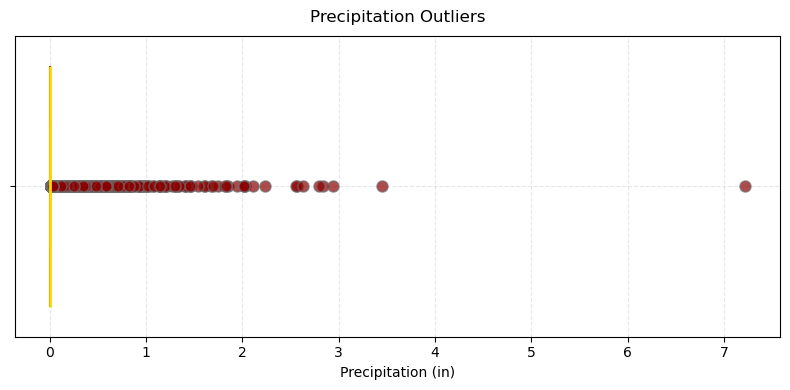


Handling: Outliers (shown as dark red points) could be capped at the bounds (0.00, 0.00) to normalize the data, 
or investigated further as they may represent valid extreme weather events (e.g., heavy storms). Dropping them risks losing significant information.



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Outlier Detection using IQR
Q1 = data['Precipitation(in)'].quantile(0.25)
Q3 = data['Precipitation(in)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Precipitation(in)'] < lower_bound) | (data['Precipitation(in)'] > upper_bound)]
print("Number of outliers:", len(outliers))
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

# Boxplot with enhanced styling
plt.figure(figsize=(8, 4))  # Smaller size
sns.boxplot(
    x=data['Precipitation(in)'], 
    color='lightcoral',         # Vibrant box color
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'darkred', 'alpha': 0.7},  # Highlight outliers
    whiskerprops={'color': 'black', 'linestyle': '--'},  # Dashed whiskers
    boxprops={'edgecolor': 'black', 'linewidth': 1.5},   # Bold box edges
    medianprops={'color': 'gold', 'linewidth': 2}        # Bold median line
)
plt.title('Precipitation Outliers', fontsize=12, pad=10)
plt.xlabel('Precipitation (in)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)  # Subtle grid
plt.tight_layout()  # Adjust layout
plt.show()

print("""
Handling: Outliers (shown as dark red points) could be capped at the bounds ({:.2f}, {:.2f}) to normalize the data, 
or investigated further as they may represent valid extreme weather events (e.g., heavy storms). Dropping them risks losing significant information.
""".format(lower_bound, upper_bound))

3. Geospatial Analysis:

/home/muhammadabdullah/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/muhammadabdullah/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/muhammadabdullah/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/muhammadabdullah/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)

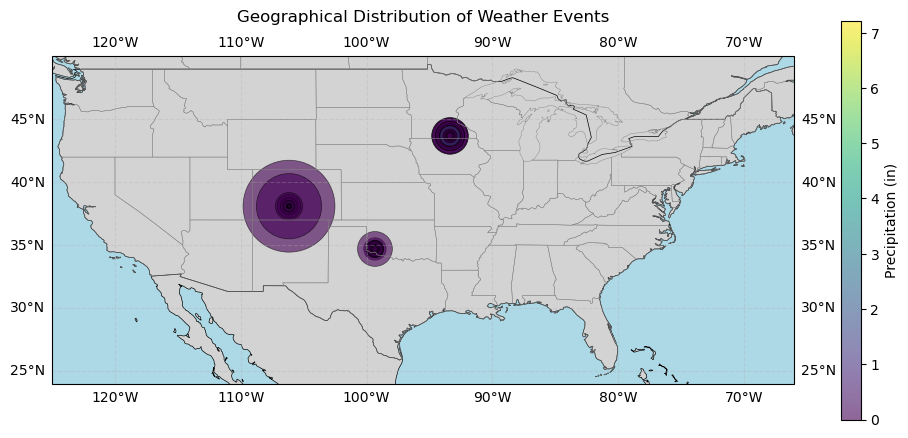


Analysis: The map shows weather events plotted across a real-world geography, with clustering around specific regions 
(e.g., Saguache, CO at ~38°N, -106°W, and Albert Lea, MN at ~43°N, -93°W, if within the US). 
Precipitation levels are indicated by color intensity (darker shades for higher amounts), 
and marker size reflects event duration (larger for longer events). 
This distribution likely corresponds to airport-based weather stations, 
revealing localized patterns of intensity and persistence across North America or the specific region covered by the data.



In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Assuming data is already loaded and cleaned in your notebook
# If not, uncomment and adjust:
# file_path = "weather_records.csv"
# data = pd.read_csv(file_path)

# Drop rows with missing lat/lng to avoid plotting errors
data = data.dropna(subset=['LocationLat', 'LocationLng', 'Precipitation(in)', 'Duration'])

# Set up the map with a real-world projection
plt.figure(figsize=(10, 6))  # Larger size for map clarity
ax = plt.axes(projection=ccrs.PlateCarree())  # Simple lat/lng projection

# Add real-world features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.3)  # US states if applicable

# Plot scatter points for weather events
scatter = ax.scatter(
    data['LocationLng'], 
    data['LocationLat'], 
    c=data['Precipitation(in)'],  # Color by precipitation
    s=data['Duration'] * 10,      # Size by duration (scaled for visibility)
    alpha=0.6,                    # Transparency for overlapping points
    cmap='viridis',               # Color map for precipitation
    edgecolor='black',            # Border for contrast
    linewidth=0.5,                # Border thickness
    transform=ccrs.PlateCarree()  # Match data to map projection
)

# Add a colorbar
plt.colorbar(scatter, label='Precipitation (in)', shrink=0.7)

# Set map extent (optional: adjust based on your data's range)
# Example for US focus: [-125, -66, 24, 50]
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())  # North America focus

# Add titles and labels
plt.title('Geographical Distribution of Weather Events', fontsize=12, pad=10)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)

# Add gridlines for reference
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis
print("""
Analysis: The map shows weather events plotted across a real-world geography, with clustering around specific regions 
(e.g., Saguache, CO at ~38°N, -106°W, and Albert Lea, MN at ~43°N, -93°W, if within the US). 
Precipitation levels are indicated by color intensity (darker shades for higher amounts), 
and marker size reflects event duration (larger for longer events). 
This distribution likely corresponds to airport-based weather stations, 
revealing localized patterns of intensity and persistence across North America or the specific region covered by the data.
""")